<a href="https://colab.research.google.com/github/jatinkchaudhary/Speech-Processing-Final-Year-Project-/blob/main/InceptionModel_RAVDESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import librosa.display
import numpy as np
from tensorflow.keras import layers, models, Model, optimizers
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
from sklearn.metrics import confusion_matrix
import sys
import matplotlib.pyplot as plt
import os
import itertools

import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
import cv2
from sklearn.utils import shuffle
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models, Model, optimizers

In [ ]:
import glob
angry = glob.glob('/content/drive/MyDrive/gen_dataset/train/angry/*.*')
calm = glob.glob('/content/drive/MyDrive/gen_dataset/train/calm/*.*')
disgust = glob.glob('/content/drive/MyDrive/gen_dataset/train/disgust/*.*')
fearful = glob.glob('/content/drive/MyDrive/gen_dataset/train/fearful/*.*')
happy = glob.glob('/content/drive/My Drive/gen_dataset/train/happy/*.*')
neutral = glob.glob('/content/drive/My Drive/gen_dataset/train/neutral/*.*')
sad = glob.glob('/content/drive/My Drive/gen_dataset/train/sad/*.*')
surprised = glob.glob('/content/drive/My Drive/gen_dataset/train/surprised/*.*')

In [ ]:
train_data = []
train_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Surprised')

train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [ ]:
X_train=train_data
y_train=train_labels

In [ ]:
import glob
angry = glob.glob('/content/drive/MyDrive/gen_dataset/test/angry/*.*')
calm = glob.glob('/content/drive/My Drive/gen_dataset/test/calm/*.*')
disgust = glob.glob('/content/drive/My Drive/gen_dataset/test/disgust/*.*')
fearful = glob.glob('/content/drive/My Drive/gen_dataset/test/fearful/*.*')
happy = glob.glob('/content/drive/My Drive/gen_dataset/test/happy/*.*')
neutral = glob.glob('/content/drive/My Drive/gen_dataset/test/neutral/*.*')
sad = glob.glob('/content/drive/My Drive/gen_dataset/test/sad/*.*')
surprised = glob.glob('/content/drive/My Drive/gen_dataset/test/surprised/*.*')

In [ ]:
test_data = []
test_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Surprised')

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [ ]:
X_test=test_data
y_test=test_labels

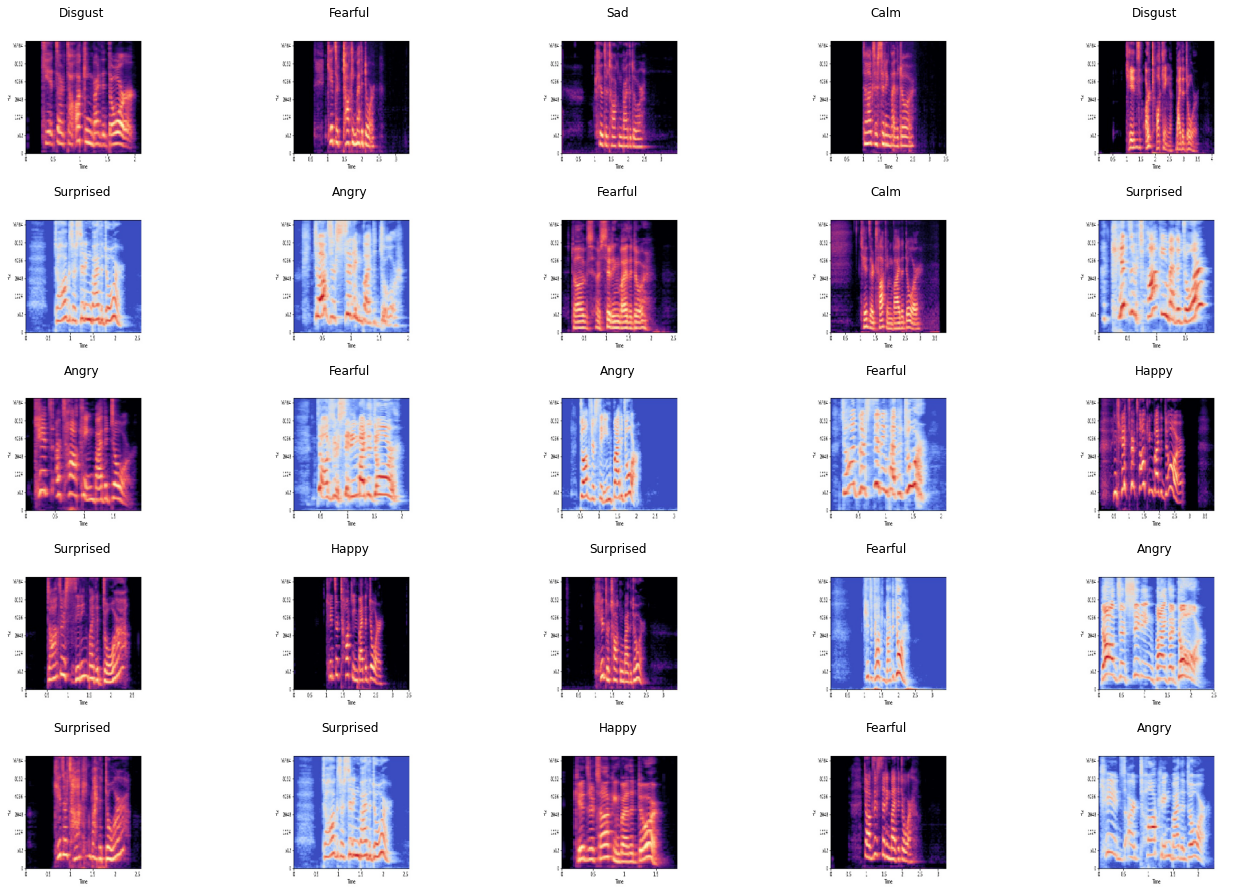

In [ ]:
from random import randint
def get_classlabel(class_code):
    labels = {'Angry':'Angry', 'Calm':'Calm', 'Disgust':'Disgust', 'Fearful':'Fearful', 'Happy':'Happy', 'Neutral':'Neutral','Sad':'Sad','Surprised':'Surprised'}
    
    return labels[class_code]

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_data))
        ax[i,j].imshow(train_data[rnd_number])
        ax[i,j].set_title(get_classlabel(train_labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
print('X_train has a shape of {}, y_train has a shape of {}'.format(X_train.shape,y_train.shape))
print('X_test has a shape of {}, y_test has a shape of {}'.format(X_test.shape,y_test.shape))

X_train has a shape of (1144, 224, 224, 3), y_train has a shape of (1144,)
X_test has a shape of (151, 224, 224, 3), y_test has a shape of (151,)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
from keras.applications import InceptionV3
pretrained_model=InceptionV3(input_shape=(224,224,3),
                             include_top=False,
                             weights='imagenet')

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in pretrained_model.layers[:283]:
  layer.trainable=False

In [ ]:
x=layers.Flatten()(pretrained_model.output)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dropout(0.01)(x)
x=layers.Dense(8,activation='softmax')(x)
model=Model(pretrained_model.input,x)

In [ ]:
for i, layer in enumerate(pretrained_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [ ]:
from keras.callbacks import ReduceLROnPlateau

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy',
                                          factor=0.3,
                                          patience=1,
                                          verbose=1,
                                          min_lr=0.000001)
                                          
# factor=0.3,
#min_lr=0.000001

# stop training when val_accuracy has stopped improving
early_stop = EarlyStopping(monitor='val_accuracy',
                                       patience=8,
                                       verbose=1,
                                       mode='max')

checkpoint = ModelCheckpoint('inception_ftu24.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

In [ ]:
learning_rate= 5e-5
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
                            epochs=30,
                            batch_size=16,
                            callbacks=[lr_reduce,checkpoint])

Epoch 1/30
72/72 [==============================] - 151s 2s/step - loss: 2.0488 - accuracy: 0.2241 - val_loss: 1.5591 - val_accuracy: 0.4106

Epoch 00001: val_accuracy improved from -inf to 0.41060, saving model to inception_ftu24.h15
INFO:tensorflow:Assets written to: inception_ftu24.h15/assets
Epoch 2/30
72/72 [==============================] - 155s 2s/step - loss: 1.0736 - accuracy: 0.6377 - val_loss: 1.3650 - val_accuracy: 0.5364

Epoch 00002: val_accuracy improved from 0.41060 to 0.53642, saving model to inception_ftu24.h15
INFO:tensorflow:Assets written to: inception_ftu24.h15/assets
Epoch 3/30
72/72 [==============================] - 145s 2s/step - loss: 0.5574 - accuracy: 0.8364 - val_loss: 1.3188 - val_accuracy: 0.5298

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.4999999621068127e-05.

Epoch 00003: val_accuracy did not improve from 0.53642
Epoch 4/30
72/72 [==============================] - 145s 2s/step - loss: 0.2315 - accuracy: 0.9686 - val_loss: 1.2943 - val_

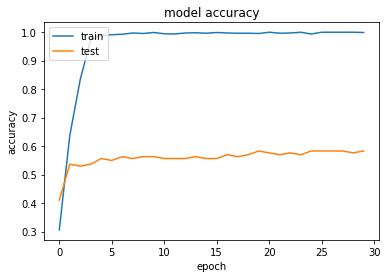

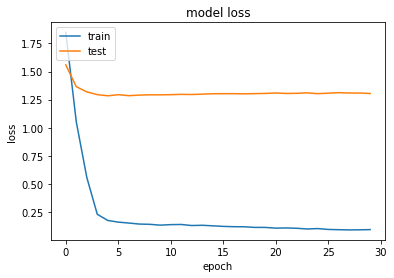

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.PuRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

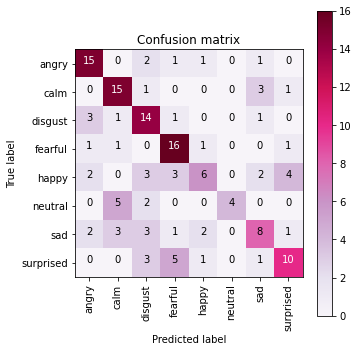

In [ ]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.65      0.75      0.70        20
        calm       0.60      0.75      0.67        20
     disgust       0.50      0.70      0.58        20
     fearful       0.59      0.80      0.68        20
       happy       0.55      0.30      0.39        20
     neutral       1.00      0.36      0.53        11
         sad       0.50      0.40      0.44        20
   surprised       0.59      0.50      0.54        20

    accuracy                           0.58       151
   macro avg       0.62      0.57      0.57       151
weighted avg       0.60      0.58      0.57       151



In [ ]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("inceptiong32.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("inceptiong32.h5")
print("Saved model to disk")

Saved model to disk
